4일 후의 프로젝트를 위해 준비된 이 데이터셋에는 인간이 작성한 리뷰와 인공지능이 작성한 리뷰가 섞여 있습니다.
하지만 어떤 리뷰가 인간에 의해 작성되었는지를 나타내는 레이블 대부분이 사라져버렸습니다.
여러분의 임무는 일부 레이블이 남아있는 학습용 데이터셋을 활용하여, 
테스트 데이터셋의 네 개 리뷰 중 어떤 것이 실제 인간에 의해 작성된 것인지 정확하게 예측하는 것입니다!
당신의 통찰력을 활용하여 테스트 데이터셋의 'label' 필드를 복구해주세요!

train.csv [파일]
id : 샘플 고유 id
sentence1 : 리뷰 텍스트 1
sentence2 : 리뷰 텍스트 2
sentence3 : 리뷰 텍스트 3
sentence4 : 리뷰 텍스트 4
label : 사람이 작성한 원본 리뷰 텍스트 번호; [1, 2, 3, 4] 중 하나


test.csv [파일]
id : 샘플 고유 id
sentence1 : 리뷰 텍스트 1
sentence2 : 리뷰 텍스트 2
sentence3 : 리뷰 텍스트 3
sentence4 : 리뷰 텍스트 4

# AI vs Human
- 목표: 1)인간과 AI 중 인간이 작성한 것을 예측하기 2)한국어 NLP모델 학습 및 적용
- To define problem: Binary classification
- Train dataset을 활용해서 Test dataset의 결측치를 알맞게 예측
- 데이터: Dacon https://dacon.io/competitions/official/236178/overview/description
- 결론 및 시사점: XGBRegressor, LGBMRegressor 모델이 예측에 가장 높은 성능을 보였음. 그러나 데이터의 단순함으로 인해 추가적인 분석을 하기에 한계가 있다고 판단함. 이를 보완하는 방법으로는 1.홍수는 시간에 따른 변동성을 가진 현상이므로 시계열 분석 2.데이터 증강 3.목표변수들 끼리도 상관관계가 존재할 수 있으므로 상호작용 피쳐 등 추가 특징을 생성

## Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# cleaning
import re
#%pip install python-mecab-ko
#from mecab import MeCab

ModuleNotFoundError: No module named 'pandas'

In [ ]:
data = pd.read_csv('C:/Users/user/p-AIvsHuman/Data/train.csv')
data.head()

,id,sentence1,sentence2,sentence3,sentence4,label
0,TRAIN_000,"직원들 마음에 들지 않는다는 것은 알겠지만, 가지 말아야 할까? 인터넷에서 싸게 살...",직원들 진짜 싸가지 없어요 ㅋㅋㅋㅋ 가지 마숑 인터넷이 더 싼거 알면서도 이것저것...,직원들 정말 싸가지 없네요 ㅋㅋㅋㅋ 인터넷에서 더 싸게 구입할 수 있다는 걸 알면서...,직원들의 태도가 정말 별로였어요 ㅋㅋㅋㅋ 가볼만한 가게라는 소문을 듣고 인터넷으로 ...,2
1,TRAIN_001,분위기 최고! 2층 창문이 넓어서 공기가 통하는 느낌이에요. 조명도 멋지고 음료와 ...,분위기가 너무 좋아요! 2층 창문이 넓어서 쾌적한 느낌이에요. 조명도 아름답고 음료...,분위기가 짱!! 2층 창문이 커서 탁 트여있는 느낌이에요 ㅎㅎ 조명도 예쁘고 음료랑...,분위기가 너무 좋아요! 2층 창문이 크고 넓어서 탁 트여있는 느낌이에요. 조명도 예...,3
2,TRAIN_002,"일단, 장사가 잘 되길 바라는 마음에서 별 다섯 개 드립니다. 간도 딱 맞았고, 저...",일단 장사가 잘되길 바라는 마음에서 별5개 드립니다 간도 맞았고 매운걸 좋아하는 입...,일단 저는 장사가 잘되기를 바라는 마음에서 별 다섯 개를 주고 싶어요. 맛도 딱 맞...,"먼저, 칭찬과 응원의 의미로 별 다섯 개를 주고 싶습니다. 간도 딱 맞고, 저는 매...",2
3,TRAIN_003,"1편의 독특함 때문에 살짝 뒤로 밀린 느낌이 있지만, 여전히 재미있어요. 게임 시스...","1편의 신선함에 비해 약간 빛이 바래 보이지만, 여전히 재미있게 즐길 수 있어요. ...","1편의 독특함 때문에 약간의 비교가 불가피하지만, 이 게임은 여전히 흥미로워요. 시...",1편이 워낙 참신했던 탓에 좀 묻힌 감이 있긴 하지만 재미는 여전합니다. 시스템도 ...,4
4,TRAIN_004,"빵점 주고 싶은걸 간신히 참았다...이런건 사상 유래가 없는,조지 루카스 영감의 스...",빵점을 주고 싶지만 참아냈습니다... 이 영화는 사상 유래가 없는 것 같아요. 조지...,빵점 주고 싶을 정도로 엄청 실망했어요... 이 영화는 별들의 전쟁처럼 역사적인 작...,"빵점을 주고 싶었는데 참았어요... 이런 영화는 전례가 없는데, 조지 루카스의 스타...",1


In [ ]:
test = pd.read_csv('C:/Users/user/p-AIvsHuman/Data/test.csv')
test.tail()

,id,sentence1,sentence2,sentence3,sentence4
1095,TEST_1095,이 곳을 좋아했지만 직원들의 불친절함이 정말 기분을 상하게 했습니다. 식사 중에도 ...,좋아하던 곳인데 아줌마가 너무 불친절하고 안에서 먹으면 쫒기듯 먹으라고 해요. 음식...,"이곳을 좋아했지만, 점원의 태도가 상당히 불친절했습니다. 실내에서 식사할 때, 빠르...","정말 좋게 느껴졌던 곳인데, 서비스가 너무 불친절했어요. 음식을 더닝끼하게 무리하게..."
1096,TEST_1096,위생 상태가 그리 좋지 않아요. 쓰레기 정리만 해놓고 끝나는 게 보여서 좀 실망스럽...,위생관리 많이 나쁨; 다 그냥 자리에 있는 쓰레기만 치우고 끝임 이 시국에..? 보...,"위생 관리 상태가 정말 나쁘네요. 그냥 자리에 있는 쓰레기만 치우고 끝나는데, 이 ...",위생 상태 저조. 쓰레기 정리만 함. 피시방이면 키보드 닦는 소리 있어야 정상인데 ...
1097,TEST_1097,냥발 두꺼워서 조작간섭 있음. 조이콘 케이스 굉장히 빡셈. 독 한번 써보려고 빼려다...,냥발이 너무 두껍고 조작이 어려워요. 조이콘 케이스를 끼우고 빼는 게 정말 힘들어요...,두꺼운 냥발로 인해 게임 조작에 영향을 받을 수 있습니다. 특히 조이콘 케이스를 장...,냥발 두꺼워서 조작간섭 있음. 조이콘 케이스 한번 끼우면 빼기 굉장히 빡셈. 독 한...
1098,TEST_1098,"일반적으로 나쁜 리뷰를 남기지 않는 편인데, 삼성역 아그라를 매우 좋아하고 자주 찾...","보통 나쁜 리뷰를 남기지 않지만, 즐겨 찾던 삼성역 아그라가 실망스러웠어요. 맛은 ...","보통 나쁜 리뷰를 쓰지 않는 편이지만, 삼성역 아그라를 정말 좋아하고 자주 방문하다...",안좋은 리뷰를 왠만해서는 안쓰는데 삼성역 아그라를 정말 좋아해서 자주가는 편인데 아...
1099,TEST_1099,이 식당이 조금 아쉬웠으면 좋겠습니다. 맛은 평범한 편이지만 직원들의 태도가 너무 ...,이런 식당은 정말 아쉽습니다. 보통 맛이지만 직원들의 태도가 너무 실망스럽습니다. ...,이런 식당은 정말 망했으면 좋겠어요. 맛은 그냥 그런 편인데 직원들이 정말 불친절해...,이런 식당은 정말 망했으면 좋겠습니다. 맛은 보통이나 직원들이 진짜 불핀절해서 기분...


In [ ]:
data.shape, test.shape

((50, 6), (1100, 5))

In [ ]:
data.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         50 non-null     object
 1   sentence1  50 non-null     object
 2   sentence2  50 non-null     object
 3   sentence3  50 non-null     object
 4   sentence4  50 non-null     object
 5   label      50 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1100 non-null   object
 1   sentence1  1100 non-null   object
 2   sentence2  1100 non-null   object
 3   sentence3  1100 non-null   object
 4   sentence4  1100 non-null   object
dtypes: object(5)
memory usage: 43.1+ KB


(None, None)

In [ ]:
data['label'].unique()

array([2, 3, 4, 1])

## EDA

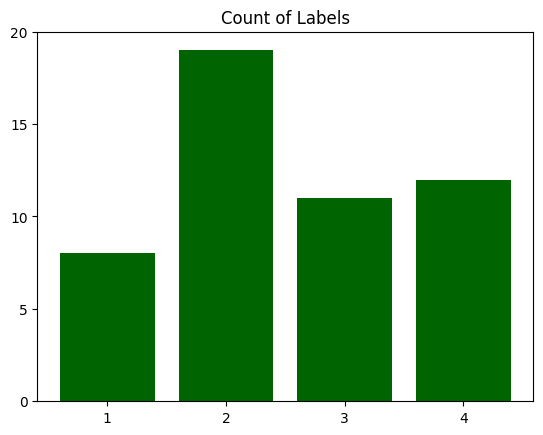

In [ ]:
labels = data.groupby('label').count()
labels = labels['id']

x = [1, 2, 3, 4]
index = np.arange(len(labels))

plt.bar(index, labels, color='darkgreen')
plt.xticks(index, x)
plt.yticks(np.arange(0, 21, 5))
plt.title('Count of Labels')
plt.show()

사람이 작성한 리뷰(train.csv)을 학습해서 라벨이 소실된 리뷰(test.csv)에서 각 데이터(row) 중에 어떤 리뷰가 사람이 작성한건지 체크하기  
사람작성 리뷰(1~4)와 AI가 작성한 리뷰를 이진분류 문제로 만들기

## Cleaning Text

In [ ]:
# 특수문자 제거, 띄어쓰기 교정
def clean(text):
    text = re.sub(r'[^가-힣A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
data['sentence1'] = data['sentence1'].apply(clean)
data['sentence2'] = data['sentence2'].apply(clean)
data['sentence3'] = data['sentence3'].apply(clean)
data['sentence4'] = data['sentence4'].apply(clean)
data.head()

#https://dacon.io/competitions/official/236178/codeshare/9138?page=1&dtype=recent

,id,sentence1,sentence2,sentence3,sentence4,label
0,TRAIN_000,직원들마음에들지않는다는것은알겠지만가지말아야할까인터넷에서싸게살수있는것도알면서나만의질문...,직원들진짜싸가지없어요가지마숑인터넷이더싼거알면서도이것저것좀물어보려는데돈되는거사는거물어...,직원들정말싸가지없네요인터넷에서더싸게구입할수있다는걸알면서도여러가지를물어보려고했는데돈을...,직원들의태도가정말별로였어요가볼만한가게라는소문을듣고인터넷으로더싼가격을알고있었는데여러가...,2
1,TRAIN_001,분위기최고2층창문이넓어서공기가통하는느낌이에요조명도멋지고음료와디저트종류도다양해서선택이...,분위기가너무좋아요2층창문이넓어서쾌적한느낌이에요조명도아름답고음료와디저트종류가다양해서친...,분위기가짱2층창문이커서탁트여있는느낌이에요조명도예쁘고음료랑디저트종류도많아서친구랑고르는...,분위기가너무좋아요2층창문이크고넓어서탁트여있는느낌이에요조명도예뻐서음료와디저트를고르는것...,3
2,TRAIN_002,일단장사가잘되길바라는마음에서별다섯개드립니다간도딱맞았고저는매운음식을좋아하니까싱겁지도않...,일단장사가잘되길바라는마음에서별5개드립니다간도맞았고매운걸좋아하는입장에서싱겁지도짜지도않...,일단저는장사가잘되기를바라는마음에서별다섯개를주고싶어요맛도딱맞았고저는매운음식을좋아해서맵...,먼저칭찬과응원의의미로별다섯개를주고싶습니다간도딱맞고저는매운음식을좋아해서싱겁지도않고짜지...,2
3,TRAIN_003,1편의독특함때문에살짝뒤로밀린느낌이있지만여전히재미있어요게임시스템이많이발전해플레이하기편...,1편의신선함에비해약간빛이바래보이지만여전히재미있게즐길수있어요게임시스템이더욱향상되어플레...,1편의독특함때문에약간의비교가불가피하지만이게임은여전히흥미로워요시스템이크게개선되어게임플...,1편이워낙참신했던탓에좀묻힌감이있긴하지만재미는여전합니다시스템도훨씬발전해서게임하기도편리...,4
4,TRAIN_004,빵점주고싶은걸간신히참았다이런건사상유래가없는조지루카스영감의스페이스오페라별들의전쟁에비하...,빵점을주고싶지만참아냈습니다이영화는사상유래가없는것같아요조지루카스의스타워즈시리즈에비하면...,빵점주고싶을정도로엄청실망했어요이영화는별들의전쟁처럼역사적인작품인줄알았는데아이들장난감보...,빵점을주고싶었는데참았어요이런영화는전례가없는데조지루카스의스타워즈와비교하면어린이장난이라...,1


## 모델링

### koELECTRA, KLUE-RoBERTa
- 트랜스포머 아키텍처를 기반으로 하는 사전 학습 언어 모델
- ELECTRA 논문 리뷰: https://tech.scatterlab.co.kr/electra-review/
- koELECTRA: 구글에서 발표한 ELECTRA(Efficiently Learning an Encoder that Classifies Token Replacements Accurately) 모델 구조를 기반의 한국어 데이터가 학습된 모델
- KLUE-RoBERTa: 한국어 이해 평가를 위한 모델(KLUE) 벤치마크를 일부로 개발, roBERTa 아키텍처를 기반으로 함

In [ ]:
import pandas as pd
import numpy as np
# 반복작업의 진행상황 시각화
from tqdm import tqdm_notebook as tqdm

# 딥러닝 모델 구현, 훈련용
import torch
import re
from torch.utils.data import Dataset, DataLoader
# 모델
from transformers import ElectraTokenizer, ElectraForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AdamW
# 최적화 알고리즘
import torch.optim as optim

from sklearn.model_selection import train_test_split
# 학습률의 단계적 조정
from torch.optim.lr_scheduler import StepLR
# 데이터 로딩 및 배치 처리
import torch.nn as nn

import warnings
warnings.filterwarnings("ignore")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.